# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: Customer conversion (Yes / No)

#### 2. What are the predictors/covariates? 

Answer: age, gender, location, profession, customer useage data

#### 3. What timeframe is this data relevent for?

Answer: Jan - Apr 2015

#### 4. What is the hypothesis?

In [ ]:
Answer: Free-tier customers likely convert to paying customers

## Let's get started with the ADMISSIONS dataset

#### 1. Create a data dictionary 

Answer: 

Variable | Description | Type of Variable
---| ---| ---
admit | 1 = admitted 0 = not admitted | categorical
gre | GRE score | continuous 
gpa | Grade Point Average | continuous 
prestige | Rank of applicant's undergraduate alma mater from 1 (highest) to 4 (lowest) | categorical 


#### 2. What is the outcome?

Answer: admit

#### 3. What are the predictors/covariates? 

Answer: gre, gpa, prestige

#### 4. What timeframe is this data relevent for?

Answer: Jan - Apr 2015

#### 4. What is the hypothesis?

Answer: Students with higher gre, gpa and prestige are more likely to be admitted

    Using the above information, write a well-formed problem statement. 


## Problem Statement

Understand if admission into graduate school can be determined by GRE score, GPA (Grade Point Average) and Rank of applicant's undergraduate alma mater (from 1 to 4, being 1 = higher prestige, 4 = lower prestige) based on UCLA data from Jan - Apr 2015.

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: 
The general objective of an exploratory analysis is to analyze data sets and summarize their main characteristics, often with visual methods.

The goal of this exploratory analysis is to identify the various factors that may influence admission into graduate school.

#### 2a. What are the assumptions of the distribution of data? 

Answer:
- Distribution is positively skewed for gre and gpa
- Data have a linear relationship

#### 2b. How will you determine the distribution of your data? 

## Determining the distribution:

### Summary of distribution (measures of central tendency, variance):

In [98]:
import pandas as pd
import os
import statsmodels.api as sm
import pylab as pl
import numpy as np

data.describe()

,admit,gre,gpa,prestige,intercept
count,400.000000,398.000000,398.00000,399.000000,400.0
mean,0.317500,588.040201,3.39093,2.486216,1.0
std,0.466087,115.628513,0.38063,0.945333,0.0
min,0.000000,220.000000,2.26000,1.000000,1.0
25%,0.000000,520.000000,3.13000,2.000000,1.0
50%,0.000000,580.000000,3.39500,2.000000,1.0
75%,1.000000,660.000000,3.67000,3.000000,1.0
max,1.000000,800.000000,4.00000,4.000000,1.0


### Mean by admit status:

#### Assessment:

- the table below shows that means for gre and gpa are higher for admitted students
- although prestige is a categorical data, its mean shows that admitted students had a lower prestige, which denotes higher ranking

In [85]:
data.groupby(['admit']).mean()


,gre,gpa,prestige
admit,,,
0,573.579336,3.345404,2.641026
1,618.897638,3.489206,2.150794


### Median by admit status:

#### Assessment:

- the table below shows that median for gre and gpa are higher for admitted students
- although prestige is a categorical data, its median shows that admitted students had a lower prestige, which denotes higher ranking

In [86]:
data.groupby(['admit']).median()

,gre,gpa,prestige
admit,,,
0,580.0,3.340,3.0
1,620.0,3.545,2.0


### Mode by admit status:

In [87]:
prest_0 = data['prestige'][data.admit == 0].mode()
prest_1 = data['prestige'][data.admit == 1].mode()

print prest_0
print prest_1

# both modes are the same


0    2.0
dtype: float64
0    2.0
dtype: float64


### Min by admit status:

#### Assessment:

- min values are lower for not admitted than for admitted students

In [88]:
data.groupby(['admit']).min()

,gre,gpa,prestige
admit,,,
0,220.0,2.26,1.0
1,300.0,2.42,1.0


### Max by admit status:

#### Assessment:

- max values don't add information to the analysis as they are the same for both admit status

In [89]:
data.groupby(['admit']).max()
# max values don't add information to the analysis


,gre,gpa,prestige
admit,,,
0,800.0,4.0,4.0
1,800.0,4.0,4.0


### Plots

#### Histogram:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c102a10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c4986d0>]], dtype=object)

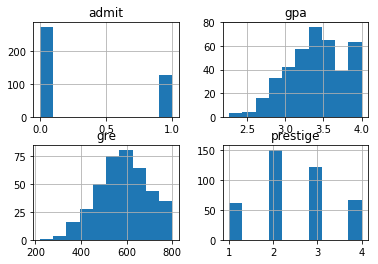

In [90]:
%matplotlib inline
import matplotlib.pylab
import numpy as np
data.hist()

#### Box Plot:

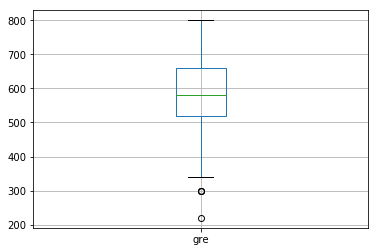

In [91]:
data.boxplot(['gre'])

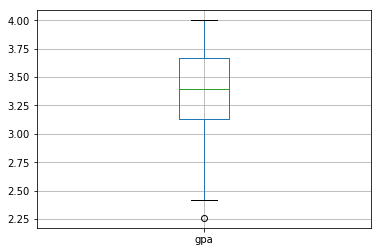

In [33]:
data.boxplot(['gpa'])

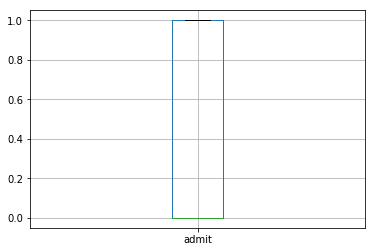

In [81]:
data.boxplot(['admit'])

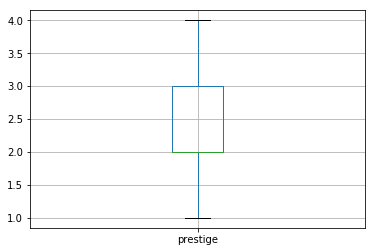

In [82]:
data.boxplot(['prestige'])

#### Density Plot:

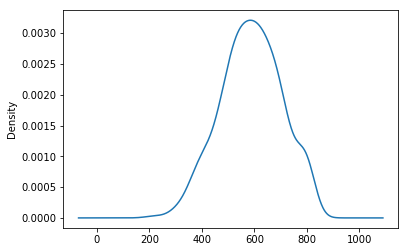

In [38]:
data['gre'].plot(kind='density')

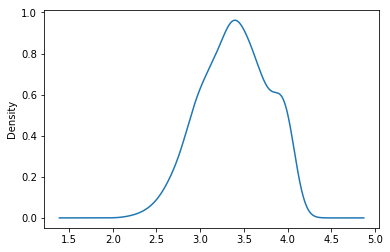

In [39]:
data['gpa'].plot(kind='density')

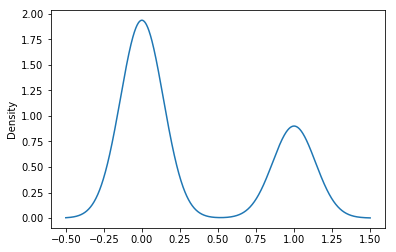

In [40]:
data['admit'].plot(kind='density')

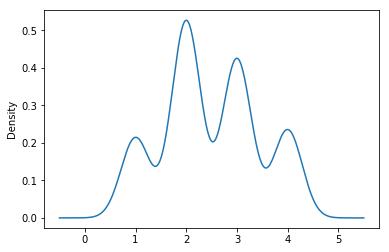

In [41]:
data['prestige'].plot(kind='density')

#### 3a. How might outliers impact your analysis? 

Box plot allows visualization of the outliers for gre and gpa. Outliers can affect the mean and standard deviation.

#### 3b. How will you test for outliers? 

Answer: 
Test for outliers: < Q1 - 1.5 x IQR or > Q3 + 1.5 IQR
Box plot shows outliers for gre and gpa.

#### 4a. What is colinearity? 


Answer: 
Colinearity means that 2 variables  are linearly related to each other.

#### 4b. How will you test for colinearity? 

In [92]:
data.corr()
# the closest to 1 or -1 the more linear is the relationship

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: 
- Outcome: admit
- Predictors: gre, gpa, prestige
- Obtain summary information (mean, median, min values) for groups admit = 0 and admit = 1 to understand distribution, proportions and do an initial hypothesis valiation
- Use Box Plot for gre, gpa and prestige (although a categorical variable) to show where the mid 50% of the distribution is located and to identify outliers. 
- Use density plot to understand the density of the distribution
- Test colinearity of variables

### Regression:

In [94]:
# dummify rank
dummy_ranks = pd.get_dummies(data['prestige'], prefix='prestige')
print dummy_ranks.head()

   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0             0             0             1             0
1             0             0             1             0
2             1             0             0             0
3             0             0             0             1
4             0             0             0             1


In [140]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data_reg = data[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
# print data_reg.head()
data_reg.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
data_reg.count() # still shows nulls

admit           400
gre             398
gpa             398
prestige_2.0    400
prestige_3.0    400
prestige_4.0    400
dtype: int64

In [136]:
# manually add the intercept
data_reg['intercept'] = 1.0

#### Performing the regression:

In [142]:
# train_cols = data_reg.columns[1:]
# # Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)

# logit = sm.Logit(data_reg['admit'], data_reg[train_cols])

# # fit the model
# result = logit.fit()

# # some records are null...

## Bonus Questions:
1. Outline your analysis method for predicting your outcome

1.a. Obtain summary information (mean, median, min values) for groups admit = 0 and admit = 1 to understand distribution, proportions and do an initial hypothesis valiation

1.b. Use Box Plot for gre, gpa and prestige (although a categorical variable) to show where the mid 50% of the distribution is located and to identify outliers. 

1.c. Use density plot to understand the density of the distribution

2. Write an alternative problem statement for your dataset

Understand if admission into graduate school can be determined by Rank of applicant's undergraduate alma mater (from 1 to 4, being 1 = higher prestige, 4 = lower prestige) based on UCLA data from Jan - Apr 2015.


3. Articulate the assumptions and risks of the alternative model
